In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df= pd.read_csv("C:/Users/smita/Downloads/Telco-Customer-Churn.csv")

In [9]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blank with 0 as tenure is 0

In [15]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",0)
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
df.isnull().sum().sum()

0

In [28]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [34]:
df["customerID"].duplicated().sum()

0

#converted SeniorCitizen that is o and 1 into true and false

In [36]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

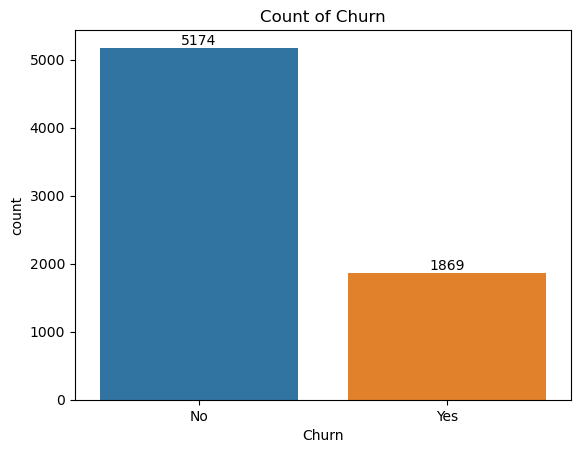

In [63]:
ax = sns.countplot(x ='Churn',data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Churn")
plt.show()

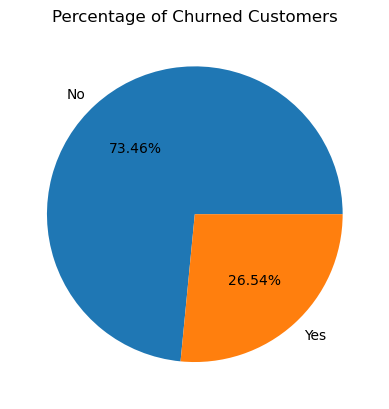

In [65]:
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels=gb.index,autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers")
plt.show()

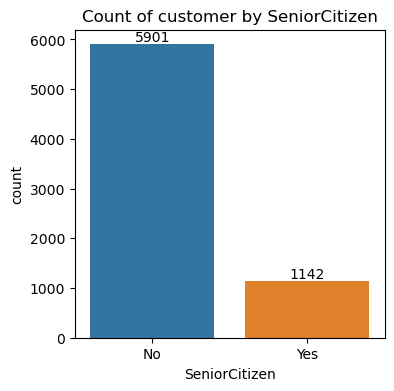

In [111]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x ='SeniorCitizen',data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customer by SeniorCitizen")
plt.show()

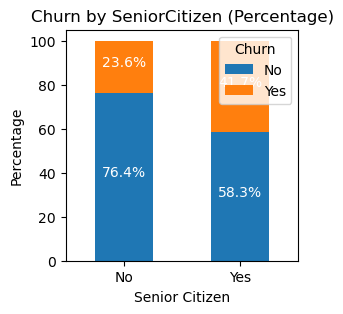

In [95]:
data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack().fillna(0)
data_pct = data.div(data.sum(axis=1), axis=0) * 100  # Convert to percentage

# Create a stacked bar chart
data_pct.plot(kind='bar', stacked=True, figsize=(3, 3), color=['#1f77b4', '#ff7f0e'])

for i in range(len(data_pct)):
    for j in range(len(data_pct.columns)):
        plt.text(i, data_pct.iloc[i, :j+1].sum() - data_pct.iloc[i, j]/2, 
                 f'{data_pct.iloc[i, j]:.1f}%', ha='center', color='white')

plt.title('Churn by SeniorCitizen (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('Senior Citizen')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

#comparitive a greater percentage of people in seniercitizen catagory have churned

C:\Users\smita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


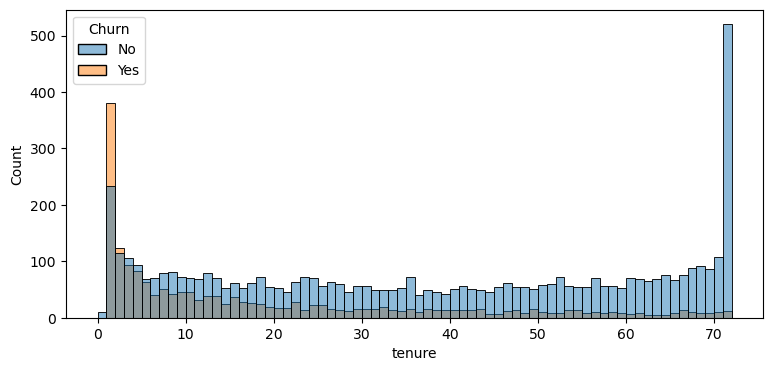

In [109]:
plt.figure(figsize = (9,4))
sns.histplot(x='tenure',data=df,bins=72,hue="Churn")
plt.show()

#people who have used our services for long time have stayed and people who used our service for 1 & 2 month have churned

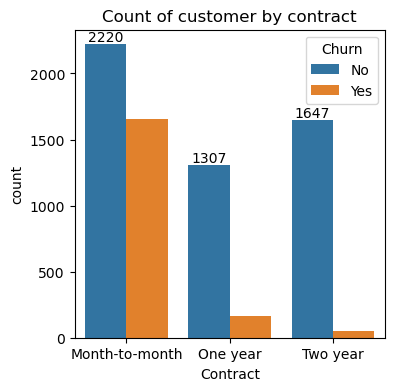

In [117]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x ='Contract',data = df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of customer by contract")
plt.show()

In [119]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

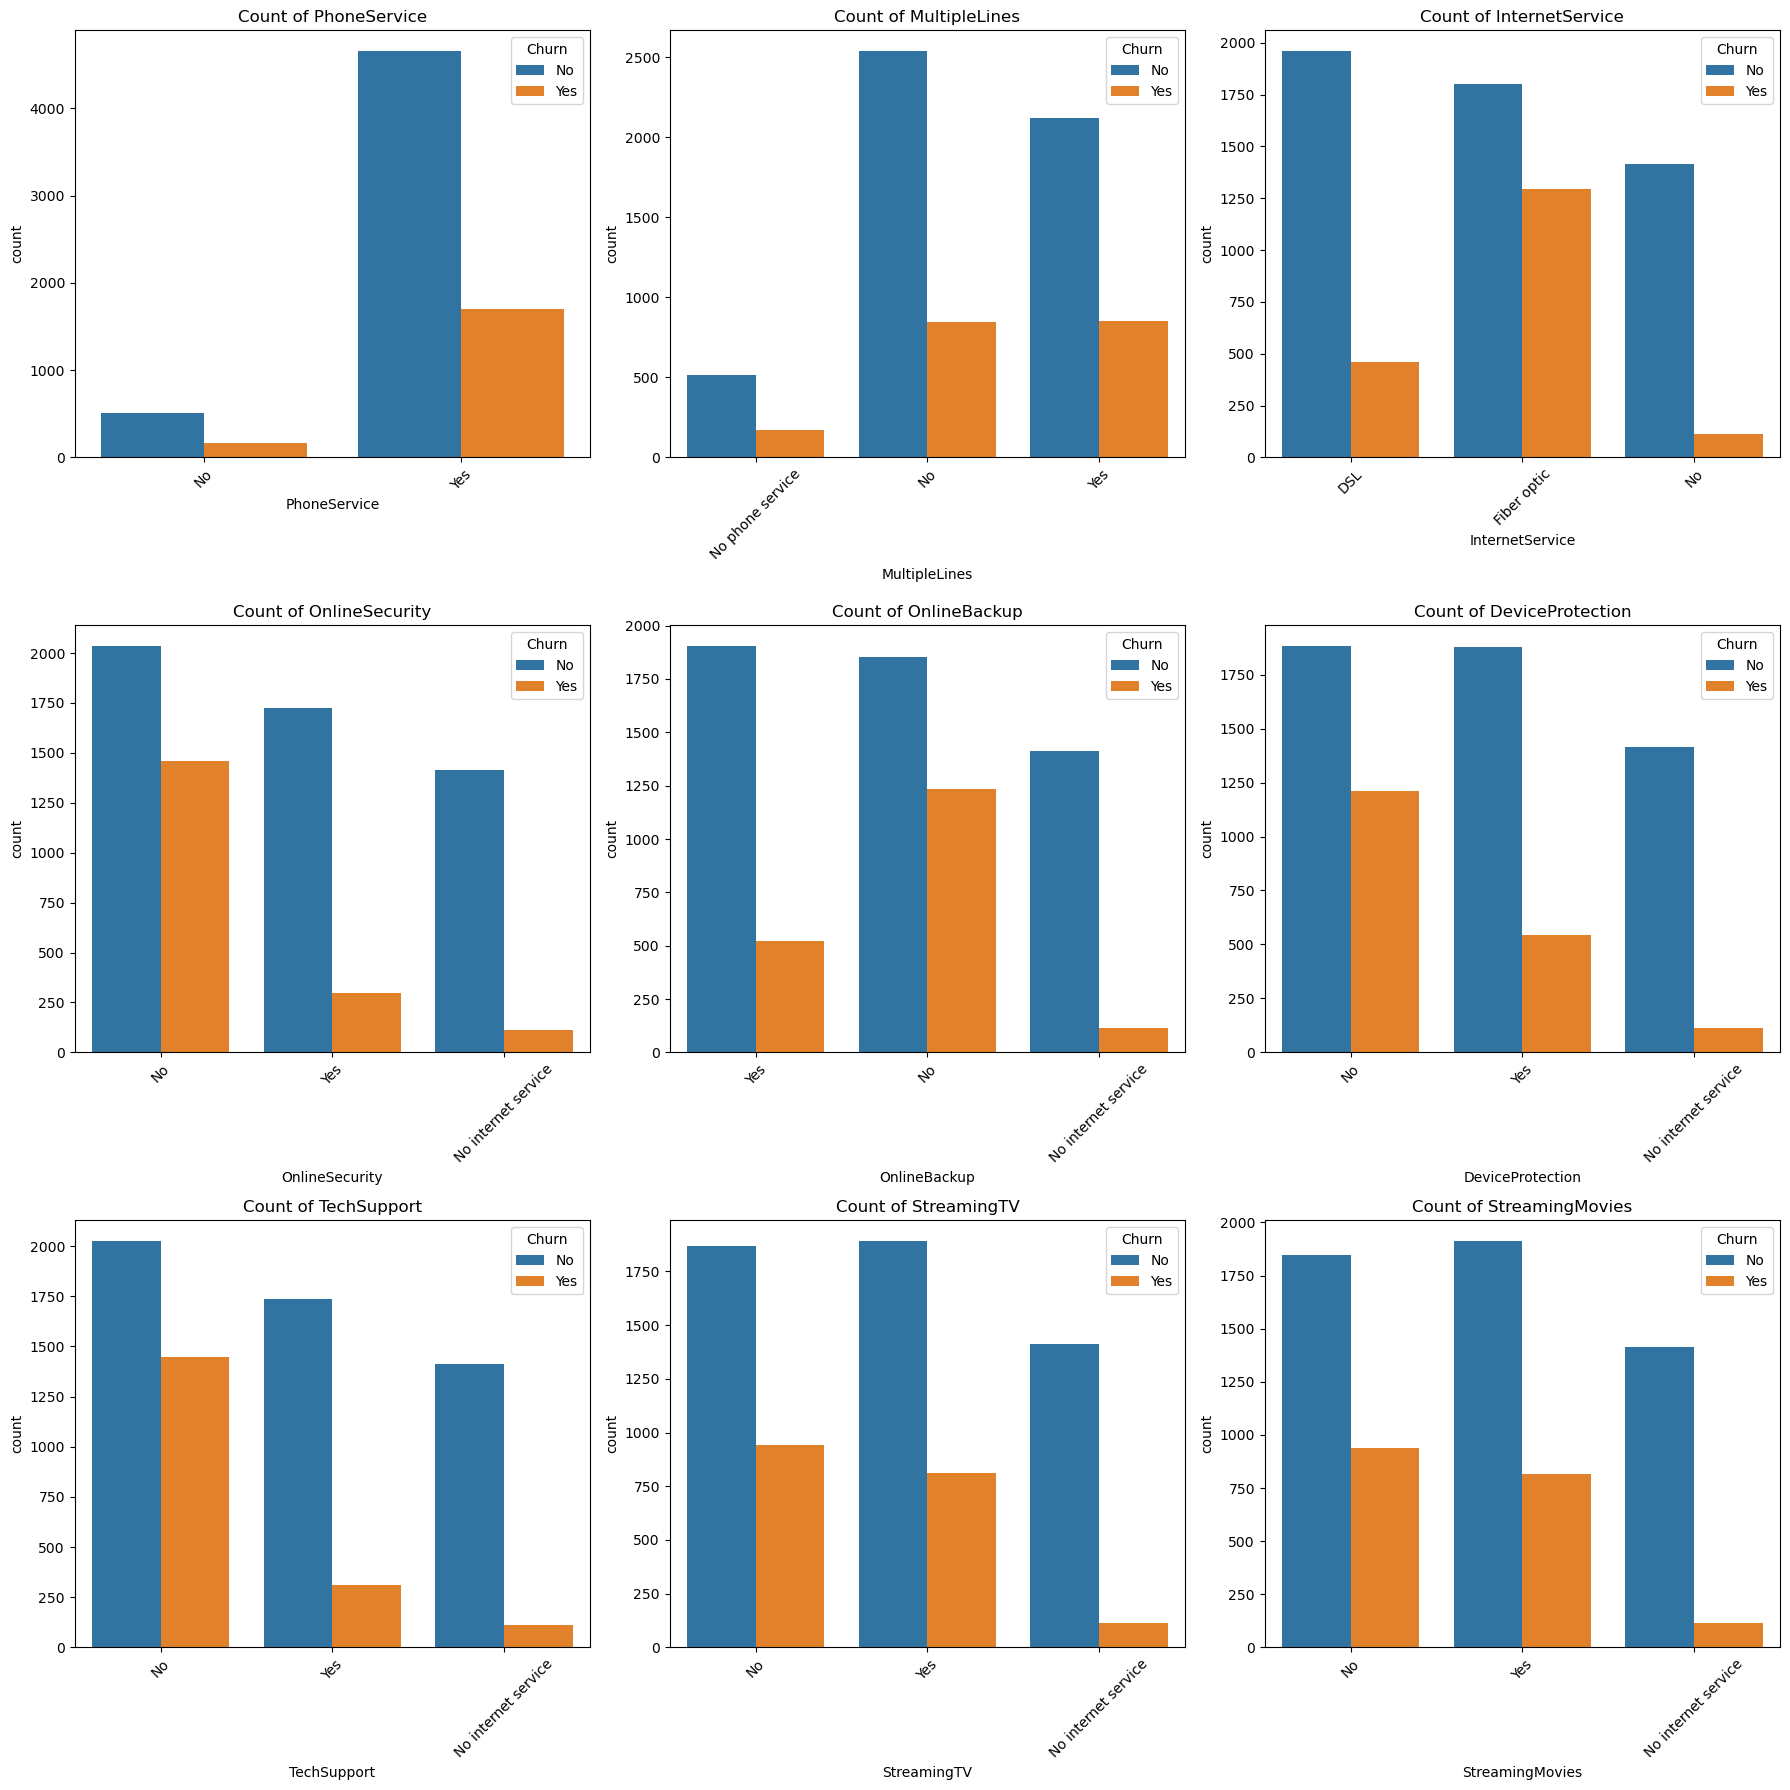

In [135]:
# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a figure and set the size
plt.figure(figsize=(18, 18))

# Loop over the columns to create subplots
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid, position i
    sns.countplot(x=column, data=df,hue='Churn')
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45)  # Rotate x labels for better readability

plt.tight_layout()  # Adjusts spacing to avoid overlap
plt.show()

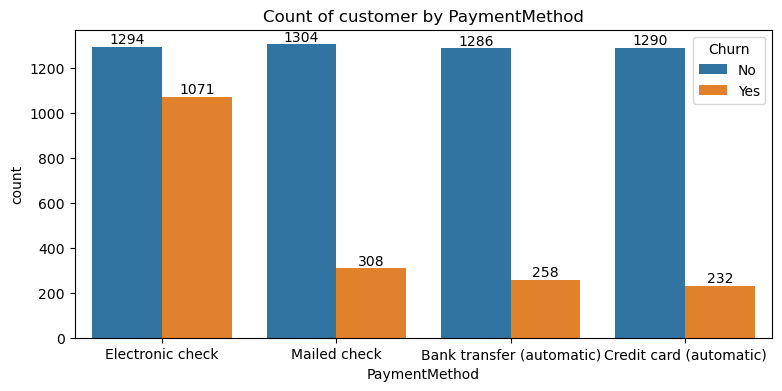

In [129]:
plt.figure(figsize = (9,4))
ax = sns.countplot(x ='PaymentMethod',data = df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of customer by PaymentMethod")
plt.show()